In [7]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import os
import sys
import time

import numpy as np
from six.moves import range
import tensorflow as tf

from google.protobuf import text_format
from tensorflow.python.platform import app
from delf import delf_config_pb2
from delf import feature_io
from delf import utils
from delf import extractor

import delf as df

import sys
import os.path as path

modulos_path = path.abspath('../minIA')
if modulos_path not in sys.path:
    sys.path.append(modulos_path)

from utiles import lectura_img
import numpy as np

import pickle
import cv2 as cv
import matplotlib.pyplot as plt

## Función de extración

Código original
https://github.com/tensorflow/models/blob/master/research/delf/delf/python/examples/extract_features.py

In [8]:
# Pace to report extraction log.
_STATUS_CHECK_ITERATIONS = 10

def extractorDELF(image_dir, config_path, output_dir, name_pickle):
    
  # Read list of images.
    print('Reading list of images...')
    image_paths = lectura_img(image_dir)
    num_images = len(image_paths)
    print(f'Done! Found {num_images} images')

  # Parse DelfConfig proto.
    config = delf_config_pb2.DelfConfig()
    with tf.io.gfile.GFile(config_path, 'r') as f:
        text_format.Merge(f.read(), config)

  # Create output directory if necessary.
    if not tf.io.gfile.exists(output_dir):
        tf.io.gfile.makedirs(output_dir)
    
  #Create pickle file
    path_pickle = path.abspath(output_dir+'//'+name_pickle)
    pickle_file = open(path_pickle, 'wb')

  #Create lista de descriptor por imagen
    descriptors = list()
    
  #Crea el extractor
    extractor_fn = extractor.MakeExtractor(config)

    start = time.time()
    for i in range(num_images):
    # Report progress once in a while.
        if i == 0:
            print('Starting to extract DELF features from images...')
        elif i % _STATUS_CHECK_ITERATIONS == 0:
            elapsed = (time.time() - start)
            print(
                f'Processing image {i} out of {num_images}, last '
                f'{_STATUS_CHECK_ITERATIONS} images took {elapsed} seconds'
            )
            start = time.time()
            
      #Carga las imágenes
        im = np.array(utils.RgbLoader(image_paths[i]))

      # Extract features.
        extracted_features = extractor_fn(im)
        
      # Save features.
        nom_img = path.split(image_paths[i])[1]
        extracted_features['local_features']['name_img'] = nom_img
        descriptors.append(extracted_features['local_features'])
    pickle.dump(descriptors, pickle_file)
    print("Termino")
    return descriptors

## Extracción de puntos de interés

In [9]:
#Output incluye el nombre del archivo
image_dir = 'D:\Archivos\Proyectos\minIA\images\GrupoDELF' #Directorio con imágenes de prueba
config_path = 'D:\Archivos\Proyectos\minIA\\notebooks\delf_config_example.pbtxt'#Ruta del archivo de configuración
output_dir = 'D:\Archivos\Proyectos\minIA\descriptors\delf\PruebaD1' #Directorio donde guarda las imágenes con KP
name_pickle = 'pruebaDELF-06-02-21.pickle'
descrip = extractorDELF(image_dir, config_path, output_dir, name_pickle)

Reading list of images...
Done! Found 42 images


Starting to extract DELF features from images...
Processing image 10 out of 42, last 10 images took 13.026405096054077 seconds
Processing image 20 out of 42, last 10 images took 12.064949035644531 seconds
Processing image 30 out of 42, last 10 images took 11.591106414794922 seconds
Processing image 40 out of 42, last 10 images took 8.71163821220398 seconds
Termino


## Descripción de conjunto de imágenes

In [10]:
print(f'Llaves de descriptores:\n {descrip[0].keys()} \n')

print('Descriptores encontrados por imagen:')
for i in range(len(descrip)):
    print(len(descrip[i]['descriptors']), end='-' )

Llaves de descriptores:
 dict_keys(['locations', 'descriptors', 'scales', 'attention', 'name_img']) 

Descriptores encontrados por imagen:
20-21-19-26-24-20-20-28-23-34-28-13-19-40-17-14-49-7-77-26-20-41-28-32-22-44-31-35-23-37-21-21-8-11-29-25-193-207-140-284-266-438-

## Descripción de una imagen  y almacenamiento

In [11]:
descr_0 = descrip[31]
print("Nombre la de imagen:",descr_0['name_img'])
print("Número de coordenadas (uno por cada Key Point):", len(descr_0['locations']))
print("Número de tamaños (uno por cada Key Point):",len(descr_0['scales']))
print("Número de descriptores en la imagen (uno por cada Key Point):", len(descr_0['descriptors']))
print("Número de puntuaciones (uno por cada Key Point):",len(descr_0['attention']))

print("\n\nDatos para el KP i")
i=3
print("Coordenadas: ", descr_0['locations'][i])
print("Tamaño: ",descr_0['scales'][i])
print("Descriptor: ", descr_0['descriptors'][i])
print("Puntuacion: ", descr_0['attention'][i])

print("Tamaño min: ",min(descr_0['scales']), "Tamaño max: ", max(descr_0['scales']))

Nombre la de imagen: 100474.jpg
Número de coordenadas (uno por cada Key Point): 21
Número de tamaños (uno por cada Key Point): 21
Número de descriptores en la imagen (uno por cada Key Point): 21
Número de puntuaciones (uno por cada Key Point): 21


Datos para el KP i
Coordenadas:  [16. 16.]
Tamaño:  0.5
Descriptor:  [-0.09987494 -0.1297017   0.14940962  0.258667    0.03765417  0.09225941
 -0.03180994  0.18422285 -0.2663465   0.08294429 -0.14288989  0.18243529
 -0.17400655 -0.39803794 -0.01457583 -0.23745163  0.10436168  0.03544267
  0.26829642 -0.1610223   0.00405661 -0.24545275 -0.19168605 -0.03772373
  0.04136625  0.1580443   0.12354498  0.21938357  0.02332662 -0.02083728
  0.0351461  -0.08357959  0.00155341  0.18002158  0.00711272  0.06001694
  0.2556943   0.21863984  0.01558027  0.0707407 ]
Puntuacion:  129.7269
Tamaño min:  0.5 Tamaño max:  1.4142271


### Creación de puntos de interés

In [12]:
#Recibe lista de keypoints de una imagen
def genKeyPoints( kp_img ):
    keypoints = list()
    for i in range (len(kp_img['locations'])):
        keypoints.append(cv.KeyPoint(kp_img['locations'][i][1], kp_img['locations'][i][0], 5*kp_img['scales'][i]))
    return keypoints

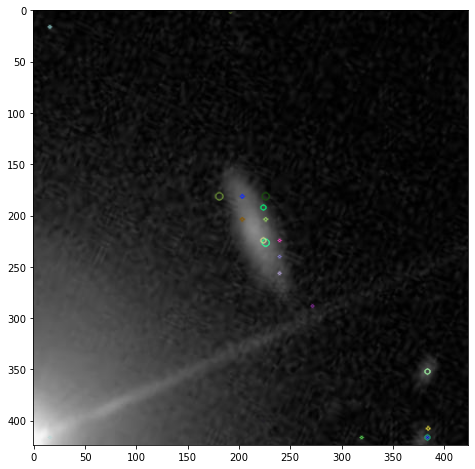

In [17]:
imagen = path.abspath(image_dir+'\\'+descr_0['name_img'])
img = cv.imread(imagen)
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
keypoints = genKeyPoints(descr_0) 
img=cv.drawKeypoints(gray,keypoints,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite(output_dir+'\\'+descr_0['name_img'],img)

plt.figure(figsize=(20,8))
plt.imshow(img)